<a href="https://colab.research.google.com/github/Zinwaiyan274/-Classification-Neural-Networks-/blob/main/Neural_Networks_for_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
fashion = keras.datasets.fashion_mnist
(xtrain, ytrain), (xtest, ytest) = fashion.load_data()

4431872/4422102 [==============================] - 0s 0us/step


Image Label : 5


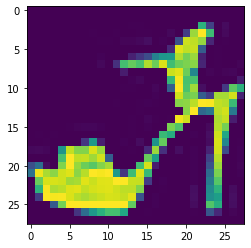

In [ ]:
imgIndex = 9
image = xtrain[imgIndex]
print("Image Label :",ytrain[imgIndex])
plt.imshow(image)

In [ ]:
print(xtrain.shape)
print(xtest.shape)

(60000, 28, 28)
(10000, 28, 28)


In [ ]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
xvalid, xtrain = xtrain[:5000]/255.0, xtrain[5000:]/255.0
yvalid, ytrain = ytrain[:5000], ytrain[5000:]

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])
history = model.fit(xtrain, ytrain, epochs=30, 
                    validation_data=(xvalid, yvalid))

Epoch 1/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.7281 - accuracy: 0.7609 - val_loss: 0.5213 - val_accuracy: 0.8264
Epoch 2/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4947 - accuracy: 0.8280 - val_loss: 0.4827 - val_accuracy: 0.8308
Epoch 3/30
1719/1719 [==============================] - 11s 6ms/step - loss: 0.4482 - accuracy: 0.8424 - val_loss: 0.4242 - val_accuracy: 0.8554
Epoch 4/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4223 - accuracy: 0.8515 - val_loss: 0.3945 - val_accuracy: 0.8664
Epoch 5/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.4010 - accuracy: 0.8596 - val_loss: 0.4008 - val_accuracy: 0.8626
Epoch 6/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3840 - accuracy: 0.8640 - val_loss: 0.3740 - val_accuracy: 0.8708
Epoch 7/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3703 - accuracy: 0.8690 - val_loss: 0.3694 - val_accuracy

In [ ]:
new = xtest[:5]
predictions = model.predict(new)
print(predictions)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]


In [ ]:
classes = np.argmax(predictions, axis=1)
print(classes)

[9 2 1 1 6]
